In [21]:
import numpy as np  
import matplotlib.pyplot as plt  
import matplotlib.font_manager  
import pandas as pd
from sklearn import svm  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, precision_recall_curve,confusion_matrix,classification_report
plt.style.use('seaborn')

In [22]:
d = pd.read_csv('C:/Users/jingy/Jupyter/Crime/Fight/CDI_Based/Intensity/CSV/Gray.csv',index_col=0)
d.Class[d['Class']==1] = -1
d.Class[d['Class'] == 0] = 1
display(d.head())

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,Class
0,884850,633930,1092930,309060,45135,31875,42840,17085,10455,6375,...,2025210,1866090,1411425,2273070,3102840,1614405,1373430,1927545,1015665,1
1,4785330,4045575,4845000,4542825,2681580,2887110,4072860,3846165,4010640,4215405,...,2620890,3143895,3709230,5087760,4491315,2700705,2603295,3078360,2572440,1
2,1759245,2026740,1386435,2034390,2596410,645150,545445,514335,1118175,1912500,...,3865290,1828605,1423920,2031585,6628215,3529965,1501695,1037085,944775,1
3,3060255,1117155,928965,818550,1079160,2412300,942225,756330,574260,772395,...,1169685,1854870,294270,494955,615060,643875,2579070,1088850,820845,1
4,1508325,2239410,694365,450075,2023935,1243890,676770,1760265,497505,554625,...,1841610,876945,509235,1857675,528105,352920,1680195,572985,364140,1


In [23]:
data = d
mask = (data['Class'] == 1)

X_train, X_test = train_test_split(data[mask], test_size=0.2, random_state=2)
X_train = X_train.drop(['Class'], axis=1)
X_test = X_test.drop(['Class'], axis=1)
X_fraud = data[~mask].drop(['Class'], axis=1)

x_test=np.vstack((X_test,X_fraud))
y_test=[1]*len(X_test)+[-1]*len(X_fraud)
std =StandardScaler()
X_train=std.fit_transform(X_train)
x_test=std.transform(x_test)


In [24]:
clf = svm.OneClassSVM(kernel='rbf',nu=0.6)  
clf.fit(X_train)  

y_pred = clf.predict(x_test)  
y_prob = clf.decision_function(x_test)  # the lower, the more normal

fpr,tpr,threshold_svc = metrics.roc_curve(y_test,y_prob)     
auc_svc = metrics.auc(fpr,tpr)   

precision, recall, _ = precision_recall_curve(y_test,y_prob)
pr_auc = auc(recall, precision)

score_svc = metrics.accuracy_score(y_test,y_pred)

print(score_svc)
print(classification_report(y_test, y_pred))

0.7666666666666667
              precision    recall  f1-score   support

          -1       0.81      0.89      0.85        88
           1       0.58      0.44      0.50        32

    accuracy                           0.77       120
   macro avg       0.70      0.66      0.67       120
weighted avg       0.75      0.77      0.76       120



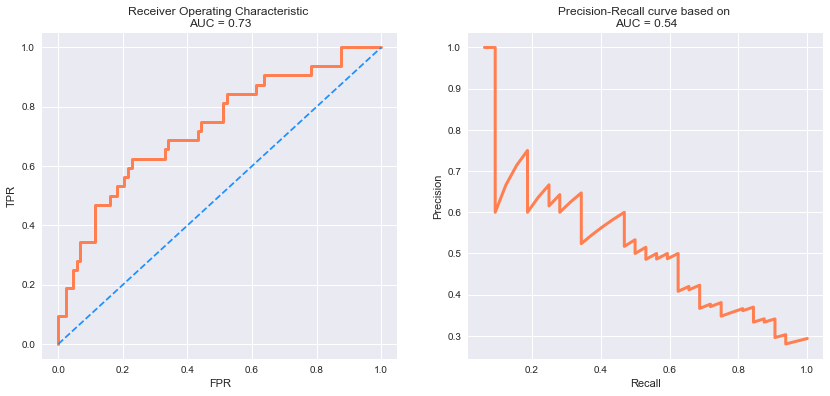

In [25]:
plt.figure(figsize=(14, 6))
plt.subplot(121)
#plt.figure(figsize=(14, 6))
plt.title('Receiver Operating Characteristic \nAUC = %0.2f'% auc_svc)   
plt.plot(fpr, tpr, c='coral', lw=3)
plt.plot([0,1],[0,1], c='dodgerblue', ls='--')
plt.ylabel('TPR'); plt.xlabel('FPR')

plt.subplot(122)
plt.title('Precision-Recall curve based on \nAUC = %0.2f'% pr_auc)
plt.plot(recall[:-2], precision[:-2], c='coral', lw=3)
plt.xlabel('Recall'); plt.ylabel('Precision')
plt.show()